### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Стелина Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 9
1. Abalone Data Set
2. Название файла: abalone.data
3. Ссылка: http://archive.ics.uci.edu/ml/datasets/Abalone
4. Класс: Sex (столбец No 1)
5. Метод отбора признаков – рекурсивное исключение признаков (RFE)
6. Модели классификации:
- наивный байесовский классификатор
- классификатор метода опорных векторов   
- классификатор метода опорных векторов с полиномиальными зависимостями (degree=2)
7. Кривая для визуализации - ROC-кривая







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.	 Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов

In [ ]:
import pandas as pd

# Задаем путь к файлу
path = '/content/drive/MyDrive/viti 4/Data mining/Lab 5/abalone.data'

# Загружаем данные, включая только столбец 0 (Sex)
data = pd.read_csv(path, header=None, usecols=[0])

# Переименовываем столбец для удобства
data.columns = ['Sex']

# Выводим первые несколько строк, чтобы убедиться, что данные загружены корректно
print(data.head())


  Sex
0   M
1   M
2   F
3   M
4   I


###2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.



In [ ]:
#Удаляем записи с пропущенными значениями в столбце 'Sex'
data.dropna(subset=['Sex'], inplace=True)

#Проверяем уникальные значения классов
classes = data['Sex'].unique()
print(f'Уникальные классы до объединения: {classes}')

# Если более двух классов, преобразуем в бинарную классификацию
if len(classes) > 2:
    # Определяем класс с наибольшим количеством точек (мажоритарный класс)
    majority_class = data['Sex'].value_counts().idxmax()

    # Преобразуем все прочие классы в один класс, отличный от мажоритарного
    data['Sex'] = data['Sex'].apply(lambda x: x if x == majority_class else 'Other')

# Проверяем баланс классов
print(data['Sex'].value_counts())

# Выводим первые несколько строк, чтобы убедиться, что данные корректно преобразованы
print(data.head())


Уникальные классы до объединения: ['M' 'F' 'I']
Sex
Other    2649
M        1528
Name: count, dtype: int64
     Sex
0      M
1      M
2  Other
3      M
4  Other


###3.  Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.



In [ ]:
import numpy as np
data = pd.read_csv(path, header=None)

# Переименовываем столбцы
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Преобразуем все признак в числовые,  кроме 'Sex'
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Если преобразование не удалось, устанавливает значение NaN

# Удалите категориальные столбцы
features = data.drop(columns=['Sex'])

# Разделите набор данных по классам
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'M' else 0)  # Преобразуем 'M' в 1 (положительный класс), остальные в 0 (отрицательный класс)

# Отделяем два класса
pos_class = data[data['Sex'] == 1]
neg_class = data[data['Sex'] == 0]

# Заменяем пропущенные значения в каждом числовом столбце
for col in features.columns:
    pos_mean = pos_class[col].mean()
    neg_mean = neg_class[col].mean()

    # Заполняем пропущенные значения в подмножествах положительного и отрицательного классов
    data.loc[data['Sex'] == 1, col] = data.loc[data['Sex'] == 1, col].fillna(pos_mean)
    data.loc[data['Sex'] == 0, col] = data.loc[data['Sex'] == 0, col].fillna(neg_mean)

# Выводим обновленный набор данных
print(data.head())


   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0    1   0.455     0.365   0.095        0.5140          0.2245   
1    1   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    1   0.440     0.365   0.125        0.5160          0.2155   
4    0   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


###4. Выполните стандартизацию признаков набора данных.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[features.columns] = scaler.fit_transform(features)
print(data.head())

   Sex    Length  Diameter    Height  Whole_weight  Shucked_weight  \
0    1 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1    1 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2    0  0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3    1 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4    0 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   

   Viscera_weight  Shell_weight     Rings  
0       -0.726212     -0.638217  1.571544  
1       -1.205221     -1.212987 -0.910013  
2       -0.356690     -0.207139 -0.289624  
3       -0.607600     -0.602294  0.020571  
4       -1.287337     -1.320757 -0.910013  


###5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Определяем модель
model = LogisticRegression(max_iter=1000)

# Извлекаем признаки и целевую переменную
X = data.drop(columns=['Sex'])  # Признаки
y = data['Sex']  # Целевая переменная

# Убедимся, что выбираем только признаки с более чем 10 уникальными значениями
unique_features = [col for col in X.columns if X[col].nunique() > 10]
X_unique = X[unique_features]

# Выполняем RFE
select = RFE(model, n_features_to_select=2)  # Выбираем 2 наиболее значимых признака
select.fit(X_unique, y)

# Получаем выбранные признаки
select_unique_features = X_unique.columns[select.support_]

# Выводим выбранные признаки
print(f'Выбранные признаки: {select_unique_features.tolist()}')


Выбранные признаки: ['Diameter', 'Shucked_weight']


###6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

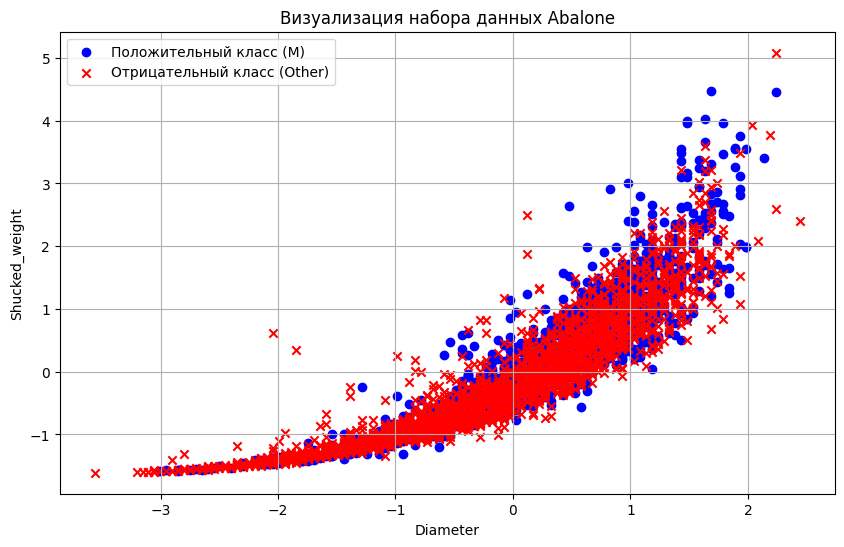

In [ ]:
import matplotlib.pyplot as plt
# Визуализация
plt.figure(figsize=(10, 6))

# Отображаем положительные и отрицательные классы
plt.scatter(data[data['Sex'] == 1][select_unique_features[0]],
            data[data['Sex'] == 1][select_unique_features[1]],
            color='blue', marker='o', label='Положительный класс (M)')  # Синий круг для положительного класса

plt.scatter(data[data['Sex'] == 0][select_unique_features[0]],
            data[data['Sex'] == 0][select_unique_features[1]],
            color='red', marker='x', label='Отрицательный класс (Other)')  # Красный крест для отрицательного класса

# Настройки графика
plt.title('Визуализация набора данных Abalone')
plt.xlabel(select_unique_features[0])  # Название оси X
plt.ylabel(select_unique_features[1])  # Название оси Y
plt.legend()  # Добавляем легенду
plt.grid(True)  # Включаем сетку
plt.show()

###7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data[select_unique_features], data['Sex'], test_size=0.3, random_state=42)

#Наивный байесовский классификатор
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_accuracy = naive_bayes_classifier.score(X_test, y_test)

#Классификатор метода опорных векторов
svm_classifier = SVC(kernel='linear',probability=True)
svm_classifier.fit(X_train, y_train)
svm_accuracy = svm_classifier.score(X_test, y_test)

#Классификатор метода опорных векторов с полиномиальными зависимостями (degree=2)
svm_polynomial_classifier = SVC(kernel='poly', degree=2,probability=True)
svm_polynomial_classifier.fit(X_train, y_train)
svm_polynomial_accuracy = svm_polynomial_classifier.score(X_test, y_test)

# Вывод результатов
print(f'Выбранные признаки: {select_unique_features.tolist()}')
print(f'Наивный байесовский классификатор (точность): {naive_bayes_accuracy:.2f}')
print(f'Классификатор метода опорных векторов (точность): {svm_accuracy:.2f}')
print(f'Классификатор метода опорных векторов с полиномиальными зависимостями (точность): {svm_polynomial_accuracy:.2f}')


Выбранные признаки: ['Diameter', 'Shucked_weight']
Наивный байесовский классификатор (точность): 0.65
Классификатор метода опорных векторов (точность): 0.63
Классификатор метода опорных векторов с полиномиальными зависимостями (точность): 0.64


###8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.

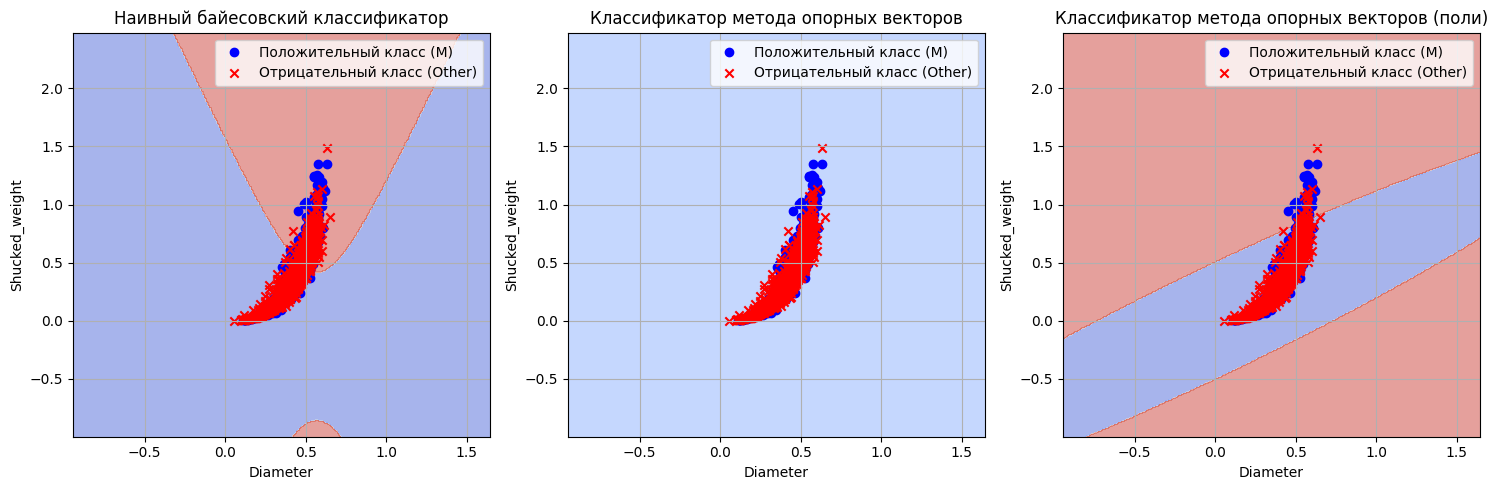

In [ ]:
# Визуализация
def graph_decision_boundaries(X, y, model, title):
    X_min, X_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    Y_min, Y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(X_min, X_max, 0.01),
                         np.arange(Y_min, Y_max, 0.01))

    # # Создайте фрейм данных для сетки
    grid_points = pd.DataFrame(np.c_[XX.ravel(), YY.ravel()], columns=[X.columns[0], X.columns[1]])

    Z = model.predict(grid_points)  # Создайте фрейм данных для сетки
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], color='blue', marker='o', label='Положительный класс (M)')
    plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], color='red', marker='x', label='Отрицательный класс (Other)')
    plt.title(title)
    plt.xlabel(select_unique_features[0])  # Названия осей
    plt.ylabel(select_unique_features[1])
    plt.legend()
    plt.grid(True)


# Создаем графики для каждого классификатора
plt.figure(figsize=(15, 5))

# Наивный байесовский классификатор
plt.subplot(1, 3, 1)
graph_decision_boundaries(X_train, y_train, naive_bayes_classifier, 'Наивный байесовский классификатор')

# Классификатор метода опорных векторов
plt.subplot(1, 3, 2)
graph_decision_boundaries(X_train, y_train, svm_classifier, 'Классификатор метода опорных векторов')

# Классификатор метода опорных векторов с полиномиальными зависимостями (degree=2)
plt.subplot(1, 3, 3)
graph_decision_boundaries(X_train, y_train, svm_polynomial_classifier, 'Классификатор метода опорных векторов (поли)')

plt.tight_layout()
plt.show()


###9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.

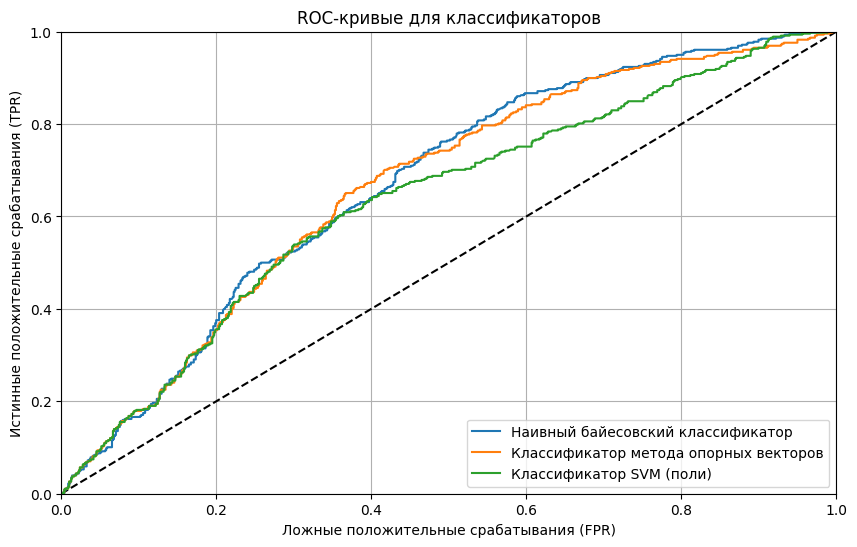

In [ ]:
from sklearn.metrics import roc_curve, auc

# Функция для построения ROC-кривой
def classif_roc_curve(classifier, X_test, y_test, label):
    y_score = classifier.predict_proba(X_test)[:, 1]  # Получаем вероятности положительного класса
    fpr, tpr, thresholds = roc_curve(y_test, y_score)  # Вычисляем TPR и FPR
    plt.plot(fpr, tpr, label=label)  # Убираем AUC из легенды

# Визуализация ROC-кривых для каждого классификатора
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Диагональ (случайный классификатор)

# Построим ROC-кривые для каждого классификатора
classif_roc_curve(naive_bayes_classifier, X_test, y_test, 'Наивный байесовский классификатор')
classif_roc_curve(svm_classifier, X_test, y_test, 'Классификатор метода опорных векторов')
classif_roc_curve(svm_polynomial_classifier, X_test, y_test, 'Классификатор SVM (поли)')

# Настройки графика
plt.title('ROC-кривые для классификаторов')
plt.xlabel('Ложные положительные срабатывания (FPR)')
plt.ylabel('Истинные положительные срабатывания (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


###10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Получаем вероятности для каждого классификатора
y_prob_naive_bayes = naive_bayes_classifier.predict_proba(X_test)[:, 1]
y_prob_svm = svm_classifier.decision_function(X_test)  # For SVC with linear kernel
y_prob_svm_polynomial = svm_polynomial_classifier.decision_function(X_test)  # For polynomial SVC

# Вычисляем AUC для каждого классификатора
auc_naive_bayes = roc_auc_score(y_test, y_prob_naive_bayes)
auc_svm = roc_auc_score(y_test, y_prob_svm)
auc_svm_polynomial = roc_auc_score(y_test, y_prob_svm_polynomial)

# Выводим результаты
print(f'AUC для наивного байесовского классификатора: {auc_naive_bayes:.2f}')
print(f'AUC для классификатора метода опорных векторов: {auc_svm:.2f}')
print(f'AUC для классификатора метода опорных векторов с полиномиальными зависимостями: {auc_svm_polynomial:.2f}')

# Определяем лучший классификатор
best_auc = max(auc_naive_bayes, auc_svm, auc_svm_polynomial)
if best_auc == auc_naive_bayes:
    best_classif = 'Наивный байесовский классификатор'
elif best_auc == auc_svm:
    best_classif = 'Классификатор метода опорных векторов'
else:
    best_classif = 'Классификатор метода опорных векторов с полиномиальными зависимостями'

print(f'Лучший классификатор: {best_classif} с AUC: {best_auc:.2f}')


AUC для наивного байесовского классификатора: 0.67
AUC для классификатора метода опорных векторов: 0.66
AUC для классификатора метода опорных векторов с полиномиальными зависимостями: 0.63
Лучший классификатор: Наивный байесовский классификатор с AUC: 0.67
